In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Scaffolds import MurckoScaffold 
import math
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn import metrics
from scipy import stats as stats
import pickle
%matplotlib inline 

Random Forest

In [ ]:
properties = ['Sol', 'VDss']
loaded_model = pickle.load(open('RF_control_{}.sav'.format(name), 'rb'))

for property in properties:
    dataset = '{}.csv'.format(property)
    pred_dataset = '{}ExternalTestSetFiltered.csv'.format(property)')

    # process data
    mols = [Chem.MolFromSmiles(s) for s in dataframe.SMILES]
    fps = [np.array(AllChem.GetMorganFingerprintAsBitVect(m,2)) for m in mols]
    dataframe["Molecule"] = mols
    dataframe["Fingerprint"] = fps

    data = pd.DataFrame(data={'Fingerprint': list(np.array(fps).astype(bool)), 'Y':  dataframe.Y.to_numpy()})

    data["Y_pred"] = loaded_model.predict(np.vstack(data.Fingerprint.to_numpy()))  # make predictions

    pair = pd.merge(data, data, how='cross') # Cross merge the data together
    pair["Fingerprint"] =  pair.Fingerprint_x.combine(pair.Fingerprint_y, np.append) # concatenate ExplicitBitVec objects from RDKIT
    pair["Delta"] = pair.Y_x - pair.Y_y # calculate Delta values
    pair["Delta_pred"] = pair.Y_pred_x - pair.Y_pred_y # calculate predicted delta values
    pair.drop(['Fingerprint_x','Fingerprint_y','Y_x','Y_y', 'Y_pred_x', 'Y_pred_y'], axis=1, inplace=True) # rid of unnecessary files
    pair.to_csv('{}_RF_Control_Preds_Ext.csv'.format(property), index = False)

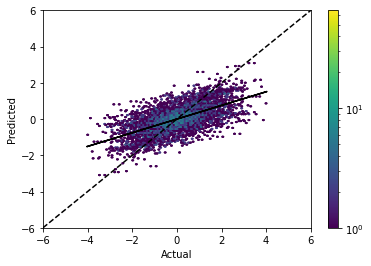

In [ ]:
### Plotting ###
properties = ['Sol', 'VDss']

for property in properties:
    name_2 = '{}-RF-Ext'.format(property)
    fig, ax = plt.subplots()

    ax.hexbin(pair['Delta'], pair['Delta_pred'], gridsize=(100),
                    norm=matplotlib.colors.LogNorm(), mincnt=1)
    fig.colorbar(ax.hexbin(pair['Delta'], pair['Delta_pred'], gridsize=(100),
                    norm=matplotlib.colors.LogNorm(), mincnt=1))

    #line of best fit
    a, b = np.polyfit(pair['Delta'], pair['Delta_pred'], 1)
    plt.plot(pair['Delta'], a*pair['Delta']+b, 'k')


    i = 6
    # X=Y line on the plot
    ax.plot([-i, i], [-i, i], 'k--')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_xlim([-i, i])
    ax.set_ylim([-i, i])
    fig.show()

    plt.savefig("{}-HB.png".format(name_2), facecolor='white', dpi = 600)

In [ ]:
### Scoring ###
pearson = stats.pearsonr(pair['Delta'], (pair['Delta_pred']))
MAE = metrics.mean_absolute_error(pair['Delta'],(pair['Delta_pred']))
RMSE = math.sqrt(metrics.mean_squared_error(pair['Delta'], (pair['Delta_pred'])))

scoring = pd.DataFrame({'Metric': ['Pearson\'s r', 'MAE', 'RMSE'], 'Value': [round(pearson[0], 3), round(MAE, 3), round(RMSE, 3)]})
scoring


,Metric,Value
0,Pearson's r,0.629
1,MAE,0.774
2,RMSE,1.000


LightGBM

In [ ]:
properties = ['Sol', 'VDss']
loaded_model = pickle.load(open('LGBM_control_subsample_{}.sav'.format(name), 'rb'))

for property in properties:
    dataset = '{}.csv'.format(property)
    pred_dataset = '{}ExternalTestSetFiltered.csv'.format(property)')

    # process data
    mols = [Chem.MolFromSmiles(s) for s in dataframe.SMILES]
    fps = [np.array(AllChem.GetMorganFingerprintAsBitVect(m,2)) for m in mols]
    dataframe["Molecule"] = mols
    dataframe["Fingerprint"] = fps

    data = pd.DataFrame(data={'Fingerprint': list(np.array(fps).astype(bool)), 'Y':  dataframe.Y.to_numpy()})

    data["Y_pred"] = loaded_model.predict(np.vstack(data.Fingerprint.to_numpy()))  # make predictions

    pair = pd.merge(data, data, how='cross') # Cross merge the data together
    pair["Fingerprint"] =  pair.Fingerprint_x.combine(pair.Fingerprint_y, np.append) # concatenate ExplicitBitVec objects from RDKIT
    pair["Delta"] = pair.Y_x - pair.Y_y # calculate Delta values
    pair["Delta_pred"] = pair.Y_pred_x - pair.Y_pred_y # calculate predicted delta values
    pair.drop(['Fingerprint_x','Fingerprint_y','Y_x','Y_y', 'Y_pred_x', 'Y_pred_y'], axis=1, inplace=True) # rid of unnecessary files
    pair.to_csv('{}_LGBM_Control_subsample_Preds_Ext.csv'.format(property), index = False)

In [ ]:
### Plotting ###
properties = ['Sol', 'VDss']

for property in properties:
    name_2 = '{}-LGBM-Control-Subsample-Ext'.format(property)
    fig, ax = plt.subplots()

    ax.hexbin(pair['Delta'], pair['Delta_pred'], gridsize=(100),
                    norm=matplotlib.colors.LogNorm(), mincnt=1)
    fig.colorbar(ax.hexbin(pair['Delta'], pair['Delta_pred'], gridsize=(100),
                    norm=matplotlib.colors.LogNorm(), mincnt=1))

    #line of best fit
    a, b = np.polyfit(pair['Delta'], pair['Delta_pred'], 1)
    plt.plot(pair['Delta'], a*pair['Delta']+b, 'k')


    i = 6
    # X=Y line on the plot
    ax.plot([-i, i], [-i, i], 'k--')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_xlim([-i, i])
    ax.set_ylim([-i, i])
    fig.show()

    plt.savefig("{}-HB.png".format(name_2), facecolor='white', dpi = 600)

In [ ]:
### Scoring ###
pearson = stats.pearsonr(pair['Delta'], (pair['Delta_pred']))
MAE = metrics.mean_absolute_error(pair['Delta'],(pair['Delta_pred']))
RMSE = math.sqrt(metrics.mean_squared_error(pair['Delta'], (pair['Delta_pred'])))

scoring = pd.DataFrame({'Metric': ['Pearson\'s r', 'MAE', 'RMSE'], 'Value': [round(pearson[0], 3), round(MAE, 3), round(RMSE, 3)]})
scoring